# Classification

In this exercise we will work with the so called "Iris"-dataset, which is a famous dataset used by the British statistician R.A. Fisher in 1936. The original dataset contained three different species of Iris-flowers, but for now we will only work with two of these: **Iris Versicolor** and **Iris Virginica**

![Iris Versicolor](https://storage.googleapis.com/machine-learning-course-datasets/versicolor.png) ![Iris Virginica](https://storage.googleapis.com/machine-learning-course-datasets/virginica.png)

The two flowers are very similar but differ in length and width of the two types of leaves of the flower crown. The two types of leaves are called petal and sepal leaves. The image below shows the two types of leaves.

![Sepal and Petal](https://storage.googleapis.com/machine-learning-course-datasets/sepal_petal_versicolor.png)

The task is to train a machine learning model to be able to distinguish these two flower species from each other.

We start by downloading the dataset.

In [1]:
!wget https://storage.googleapis.com/machine-learning-course-datasets/iris_binary.csv -O /tmp/iris_binary.csv

--2019-05-31 12:43:44--  https://storage.googleapis.com/machine-learning-course-datasets/iris_binary.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2727 (2.7K) [application/octet-stream]
Saving to: ‘/tmp/iris_binary.csv’

/tmp/iris_binary.cs 100%[===================>]   2.66K  --.-KB/s    in 0s      

2019-05-31 12:43:45 (25.9 MB/s) - ‘/tmp/iris_binary.csv’ saved [2727/2727]



In [0]:
import pandas as pd
data=pd.read_csv("/tmp/iris_binary.csv")

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


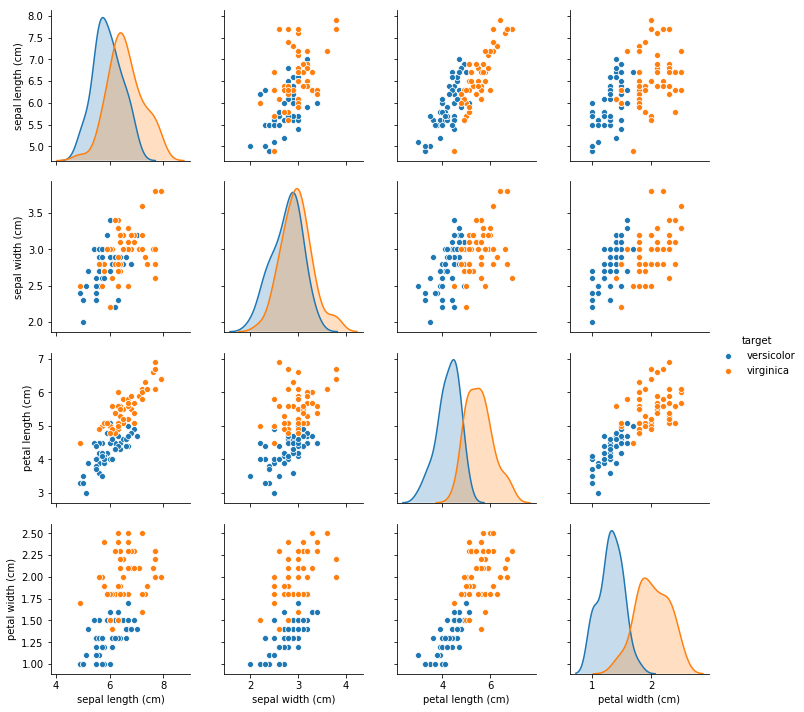

In [5]:
import seaborn as sns;
sns.pairplot(data, vars=data.columns[:4], hue="target")

## Perceptron

For our classification problem we want to find a function that takes the four measurements as inputs and outputs the species. So, we start by defining **X** and **y**.

In [0]:
X=data[data.columns[:4]]
y=data["target"]

Scikit-learn has an implementation of a perceptron, which is easy to use.

In [23]:
from sklearn.linear_model import Perceptron

classifier = Perceptron()
classifier.fit(X, y) 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

We now have a classifier that we can use to make predictions. Suppose we have new Iris flower with the following measurements:


sepal length (cm)	| sepal width (cm)	| petal length (cm)	| petal width (cm) 
--- | --- | --- | ---
 6.5 | 3.0 | 4.6 | 1.3 
 
 We can use the model to make a prediction

In [27]:
classifier.predict([[6.5, 3.0, 4.6, 1.3]])[0]

'versicolor'

We can also see the coeficients of the trained perceptron model.

In [25]:
print(classifier.coef_)
print(classifier.intercept_)

[[-32.3 -26.6  51.9  50.1]]
[-20.]


### How good is the model?

We can try the model on the dataset and see how many out of the 100 observations it gets right.

In [0]:
y_predicted=classifier.predict(X)
sum(y==y_predicted)

How good do you think the perceptron is for this classification problem?


## Decision Tree

Let us try another classifier. One of the good things about scikit-learn is that it is easy to replace one classifier with another. The [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is a commonly used algorithm.

In [32]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

A nice thing about decision trees is that it is possible to plot how it works, and compared to many other algorithms it is easy to interpret how data is classified.

[Text(167.4, 181.2, 'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(83.7, 108.72, 'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [49, 5]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.041\nsamples = 48\nvalue = [47, 1]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 4.85\nentropy = 0.043\nsamples = 46\nvalue = [1, 45]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 43\nvalue = [0, 43]')]

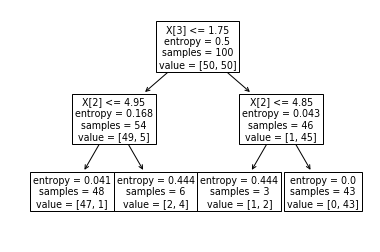

In [34]:
tree.plot_tree(classifier) 

So how well is the new classifier doing?

In [33]:
y_predicted=classifier.predict(X)
sum(y==y_predicted)

96

Is this a good result?

### K-Nearest Neighbours

Try to use the [K-Nearest Neghbours Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) on this problem as well.